In [8]:
import numpy as np
import sys
import os
import random
import matplotlib.pyplot as plt
import math
sys.path.append('../')
os.getcwd()


from src.GridWorld import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#Varying epsilon and Gamma for Sarsa
#Takes a long time!

def run_several(repeats,episodes,epsilon,alpha,algo):
    
    acc = np.zeros((repeats,episodes))
    for i in range(repeats):
        if algo == "sarsa":    
            V,Q,opt_pol,learning,mse,sauc = grid.SARSA_Control(epsilon = epsilon,discount = 0.2,episodes = episodes,alpha = alpha,epsilon_constant = False,alpha_constant = False)
        else:
            V,Q,opt_pol,learning,mse,sauc = grid.mc_iterative(epsilon = epsilon,discount = 0.2,episodes = episodes,alpha = alpha,epsilon_constant = False,alpha_constant = False)
        acc[i,:] = np.array(learning)
    return acc


def explore_alpha_epsilon(alphas, epsilons,repeats,discount,episodes,algo):

    fig,ax = plt.subplots(len(alphas),len(epsilons),sharex = True,sharey = True)
    
    for i,alpha in enumerate(alphas):
        
        
        for j,epsilon in enumerate(epsilons):
            
            result = run_several(repeats = repeats,episodes = episodes,epsilon = epsilon,alpha = alpha,algo = algo)
            
            ax[i,j].plot(np.linspace(0,episodes,episodes),np.mean(result,axis = 0),color = 'r')
            ax[i,j].set_title('epsilon: {}, alpha: {}'.format(epsilon, alpha))
            print("one done")
    
    fig.set_figheight(20)
    fig.set_figwidth(20)
    plt.savefig("Bigplot_alphadec_" + algo)    
    plt.show()

### Setting up the grid world

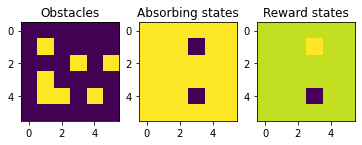

In [10]:
grid = GridWorld(p = 0.65)

## Solutions to Question 2

### This code solves questiion 2.b.

#### Question 2.b.1, 2.b.2 and 2.b.3

Credits to the LabSessions for the value iteration code. This code must be run before any later code can be run to compute the optimal value function. This is used for computing the RMSE of our estimations for MC and TD. 

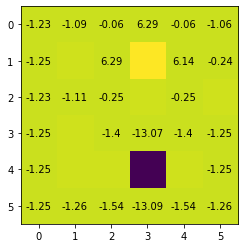

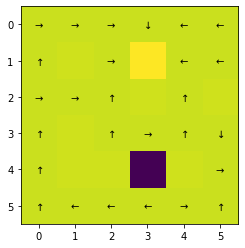

7


In [11]:
V2,opt_pol2,epochs2 = grid.value_iteration(discount = 0.2,threshold = 0.0001)
grid.draw_value(V2)
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol2[row,:]) for row in range(grid.state_size)]))
print(epochs2)

### This code solves questiion 2.c.

#### Question 2.c.1 and 2.c.2

Value function output from MC


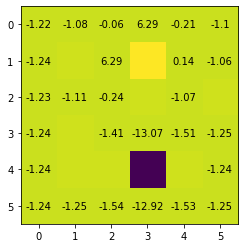

Optimal policy output from MC


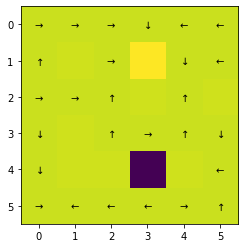

Count of how often a pair visited


In [16]:
V3,Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(epsilon = 0.1,discount = 0.2,episodes = 500000,alpha = 0.5,epsilon_constant = False)
print("Value function output from MC")
grid.draw_value(V3)
print("Optimal policy output from MC")
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol3[row,:]) for row in range(grid.state_size)]))
print("Count of how often a pair visited")
#print(sauc3)
msesave3 = mse3
learningsave3 = learning3

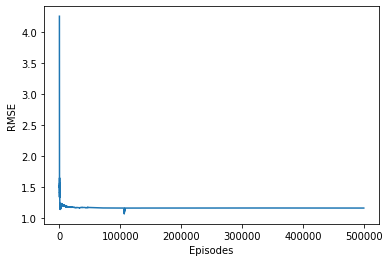

In [17]:
plt.plot(mse3)
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.show()

#### Question 2.c.3

Plotting learning curve from our MC algorithm


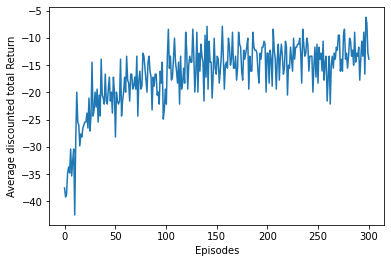

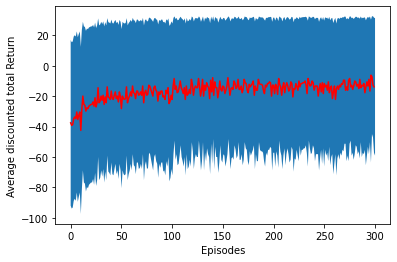

In [7]:
repeats = 200
episodes = 300
acc3 = np.zeros((repeats,episodes))
for i in range(repeats):
    V3,Q3,opt_pol3,learning3,mse3,sauc3 = grid.mc_iterative(epsilon = 0.1,discount = 0.2,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc3[i,:] = np.array(learning3)

print("Plotting learning curve from our MC algorithm")
plt.plot(np.linspace(0,episodes,episodes),np.mean(acc3,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

plt.plot(np.mean(acc3,axis = 0),color = 'r')
plt.fill_between(np.linspace(0,episodes,episodes),np.mean(acc3,axis = 0) - np.std(acc3,axis = 0),np.mean(acc3,axis = 0) + np.std(acc3,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

In [ ]:
#Manually looking at results for different hyperparameters
alphas = [1,0.9,0.8,0.7,0.6,0.5,0.4]
epsilons = [0.5,0.25,0.1,0.05,0.01]
discount = 0.2
Vs = np.zeros((len(alphas),len(epsilons)))
pols = np.zeros((len(alphas),len(epsilons)))

V_sols = []
Q_sols = []
opt_pol_sols = []
learning_sols = []
mse_sols = []
sauc_sols = []


for i,alpha in enumerate(alphas):
    
    for j, epsilon in enumerate(epsilons):
        
        V_X,Q_X,opt_pol_X,learning_X,mse_X,sauc_X = grid.mc_iterative(epsilon = epsilon,discount = 0.2,episodes = 100000,alpha = alpha,epsilon_constant = False)
        
        V_sols.append(V_X)
        Q_sols.append(Q_X)
        opt_pol_sols.append(opt_pol_X)
        learning_sols.append(learning_X)
        mse_sols.append(mse_X)
        sauc_sols.append(sauc_X)
        Vs[i,j] = math.sqrt(((V_X - V2)**2).mean(axis=None))
        pols[i,j] = np.sum(opt_pol_X == opt_pol2)
        if np.array_equal(opt_pol_X,opt_pol2):
            print("Success with epsilon {} & alpha {}".format(epsilon,alpha))

print(pols)
print(Vs)

#### Question 2.c.4

In [ ]:
#Varying epsilon and Gamma for MC
#Takes a long time
    
alphas = [1,0.5,0.1,0.01]
epsilons = [1,0.1,0.01,0.001]
discount = 0.2
episodes = 350
repeats = 50

explore_alpha_epsilon(alphas,epsilons,repeats,discount,episodes,"mc")

### This code solves questiion 2.d. 

#### Question 2.d.1 and 2.d.2

Value function output from MC


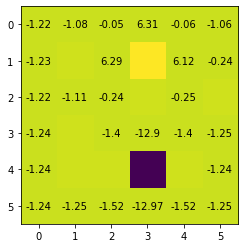

Optimal policy output from MC


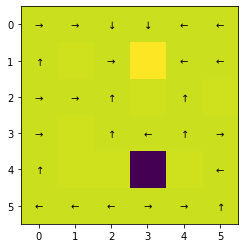

Count of how often a pair visited


In [12]:
V4,Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(epsilon = 0.1,discount = 0.2,episodes = 500000,alpha = 0.5,epsilon_constant = False)
print("Value function output from MC")
grid.draw_value(V4)
print("Optimal policy output from MC")
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol4[row,:]) for row in range(grid.state_size)]))
print("Count of how often a pair visited")
#print(sauc4)
msesave4 = mse4
learningsave4 = learning4

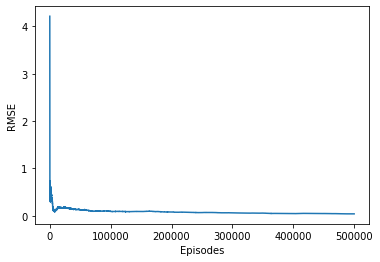

In [13]:
plt.plot(mse4)
plt.xlabel("Episodes")
plt.ylabel("RMSE")
plt.show()

#### Question 2.d.3

Plotting learning curve from our TD algorithm


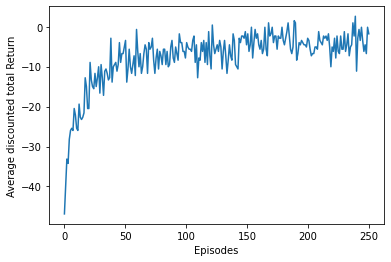

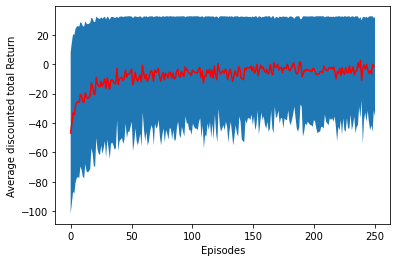

In [14]:
repeats = 200
episodes = 250
acc4 = np.zeros((repeats,episodes))
for i in range(repeats):
    V4,Q4,opt_pol4,learning4,mse4,sauc4 = grid.SARSA_Control(epsilon = 0.1,discount = 0.2,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc4[i,:] = np.array(learning4)

print("Plotting learning curve from our TD algorithm")
plt.plot(np.linspace(0,episodes,episodes),np.mean(acc4,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

plt.plot(np.mean(acc4,axis = 0),color = 'r')
plt.fill_between(np.linspace(0,episodes,episodes),np.mean(acc4,axis = 0) - np.std(acc4,axis = 0),np.mean(acc4,axis = 0) + np.std(acc4,axis = 0))
plt.xlabel("Episodes")
plt.ylabel("Average discounted total Return")
plt.show()

#### Question 2.d.4.:

In [ ]:
#Varying epsilon and Gamma for Sarsa
#Takes a long time
    
alphas = [1,0.5,0.1,0.01]
epsilons = [1,0.1,0.01,0.001]
discount = 0.2
episodes = 350
repeats = 50

explore_alpha_epsilon(alphas,epsilons,repeats,discount,episodes,"sarsa")

In [ ]:
#Manualy looking at results for different hyperparameters
alphas = [1,0.95,0.9,0.85,0.8,0.75,0.7]
epsilons = [1,0.75,0.5,0.25]
discount = 0.2
Vs = np.zeros((len(alphas),len(epsilons)))
pols = np.zeros((len(alphas),len(epsilons)))

V_sols = []
Q_sols = []
opt_pol_sols = []
learning_sols = []
mse_sols = []
sauc_sols = []


for i,alpha in enumerate(alphas):
    
    for j, epsilon in enumerate(epsilons):
        
        V_X,Q_X,opt_pol_X,learning_X,mse_X,sauc_X = grid.SARSA_Control(epsilon = epsilon,discount = 0.2,episodes = 150000,alpha = alpha,epsilon_constant = False)
        
        V_sols.append(V_X)
        Q_sols.append(Q_X)
        opt_pol_sols.append(opt_pol_X)
        learning_sols.append(learning_X)
        mse_sols.append(mse_X)
        sauc_sols.append(sauc_X)
        
        
        
        Vs[i,j] = math.sqrt(((V_X - V2)**2).mean(axis=None))
        pols[i,j] = np.sum(opt_pol_X == opt_pol2)
        if np.array_equal(opt_pol_X,opt_pol2):
            print("Success with epsilon {} & alpha {}".format(epsilon,alpha))
        else:
print(pols)
print(Vs)

### This code solves questiion 2.e.

#### Question 2.e.1.:

Plotting RMSE agains episodes for both MC and TD


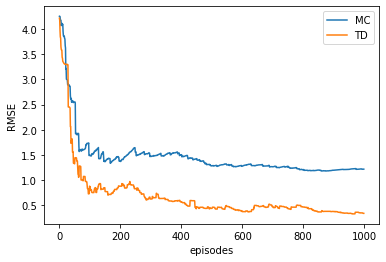

In [18]:
print("Plotting RMSE agains episodes for both MC and TD")
plt.plot(msesave3[:1000],label = 'MC')
plt.plot(msesave4[:1000],label = 'TD')
plt.xlabel("episodes")
plt.ylabel("RMSE")
plt.legend()
plt.show()

#### Question 2.e.2.:

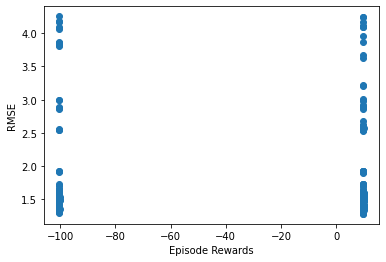

In [19]:
plt.scatter(learningsave3[:500],msesave3[:500])
plt.xlabel("Episode Rewards")
plt.ylabel("RMSE")
plt.show()

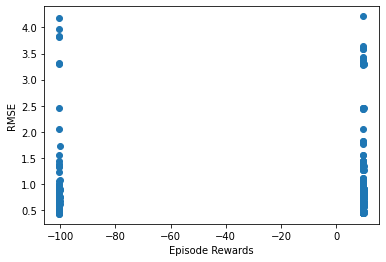

In [20]:
plt.scatter(learningsave4[:500],msesave4[:500])
plt.xlabel("Episode Rewards")
plt.ylabel("RMSE")
plt.show()

In [21]:
repeats = 100
episodes = 350
acc_learning_5 = np.zeros((repeats,episodes))
acc_mse_5 = np.zeros((repeats,episodes))
for i in range(repeats):
    V5,Q5,opt_pol5,learning5,mse5,sauc5 = grid.mc_iterative(epsilon = 0.1,discount = 0.2,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc_learning_5[i,:] = np.array(learning5)
    acc_mse_5[i,:] = np.array(mse5)

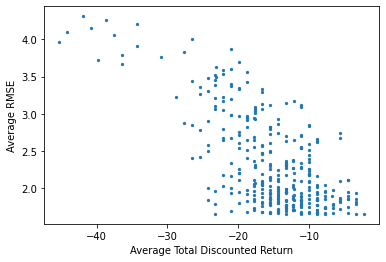

In [22]:

plt.scatter(np.mean(acc_learning_5,axis = 0),np.mean(acc_mse_5,axis = 0),s = 5)
plt.xlabel("Average Total Discounted Return")
plt.ylabel("Average RMSE")
plt.show()



In [ ]:
repeats = 100
episodes = 350
acc_learning_6 = np.zeros((repeats,episodes))
acc_mse_6 = np.zeros((repeats,episodes))
for i in range(repeats):
    V6,Q6,opt_pol6,learning6,mse6,sauc6 = grid.SARSA_Control(epsilon = 1,discount = 1,episodes = episodes,alpha = 0.5,epsilon_constant = False)
    acc_learning_6[i,:] = np.array(learning6)
    acc_mse_6[i,:] = np.array(mse6)

In [ ]:
plt.scatter(np.mean(acc_learning_6,axis = 0),np.mean(acc_mse_6,axis = 0),s = 5)
plt.xlabel("Average Total Discounted Return")
plt.ylabel("Average RMSE")
plt.show()
